Recap-
1. Convolutional Neural Network- Feature Extraction, Dim Reduction
2. Layers- 
1. Convolution Layer - Kernel Matrix
2. Maxpooling layer- subsampling
3. Activation layer- Relu
4. FCN

# New Section

# Directory Structure
Dataset- 1.Train Set
            1.1Dog- Images
            1.2Cat
            1.3 Tiger
        -Test Set 
            Dog
            Cat
            Tiger

In [1]:
# Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

from keras.datasets import mnist
(X_train, y_train), (X_test,y_test)=mnist.load_data()

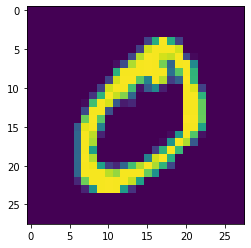

In [4]:
#Creating an image plot
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [5]:
#Size of image
X_train[0].shape

(28, 28)

In [6]:
#The images are 28x28 pixel grey scale, and there are 60000 images/observations in this dataset.
X_train.shape



(60000, 28, 28)

In [7]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)


In [8]:
#60000 images, 28x28x1
X_train.shape 

(60000, 28, 28, 1)

In [9]:
#label of the input - I have 10 labels here, from 0-9.
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
#Convert the output into 0 and 1
from tensorflow.keras.utils import to_categorical
#One hot encoding on target column
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


In [11]:
#Convert data into 0 and 1
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
#60000 tuples, and 10 columns - now data is categorical.
y_train.shape

(60000, 10)

In [13]:
from keras.backend import softmax
#CNN architecture
#Create the model.
model=Sequential()
#Add the CNN layers.
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu')) #Note that input shape is removed, as this is only necessary for the first layer.

#FCN
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='softmax'))

What is the change in the shape and how many parameters are we learning?

Shape - 28x28 = 26x26 in 1st layer, then 24x24 in next layer. Filter is 3x3.
(input)-(filter-1)

First layer
28-(3-1) = 26, which is in the first layer, - 64 filters in layer one

Second layer

24*24*32

Parameters
((Filter) + Bias)*filters

First layer
((3*3)+1)*64 layers in first = 640 features in layer one

Second layer

((3*3*64)+1)*32 = 18464


Flattened layer

24*24*32 = 18432

Dense (hidden) layer
Bias is added here.

18432*1000


In [14]:
#First convolutional layer is 26x26 - 64 filters - 640 parameters
model.summary() #18432+1 = 18433*1000 = 18433000

#1000*10 = 10010

#Add total parameters = 640, 18464, 0, 18433000, 10010

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 1000)              18433000  
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 18,462,114
Trainable params: 18,462,114
Non-trainable params: 0
_________________________________________________________________


In [15]:
#CNN architecture
#Create the model.
model=Sequential()
#Add the CNN layers.
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=(28,28,1))) #You may not want to reduce size of image, use padding values.
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=62,kernel_size=(5,5),activation='relu')) #Note that input shape is removed, as this is only necessary for the first layer.
model.add(MaxPooling2D(pool_size=(2,2)))
#FCN
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 62)          49662     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 62)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 992)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)             

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(X_train,y_train,
          validation_data=(X_test,y_test),epochs=5)
#If you do not pass a batch size, the automatic is 32.
#60,000/32 = 1875 iterations

Epoch 1/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.2994 - accuracy: 0.9497 - val_loss: 0.0692 - val_accuracy: 0.9786
Epoch 2/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0739 - accuracy: 0.9780 - val_loss: 0.0667 - val_accuracy: 0.9791
Epoch 3/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0667 - accuracy: 0.9807 - val_loss: 0.0618 - val_accuracy: 0.9823
Epoch 4/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0627 - accuracy: 0.9824 - val_loss: 0.0748 - val_accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0511 - accuracy: 0.9858 - val_loss: 0.1015 - val_accuracy: 0.9772


In [20]:
model.evaluate(X_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]